# 1.Importamos librerías

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# 2.Importamos datos

In [18]:
# Leer los datos del archivo csv
df = pd.read_csv("winequality_kmeans.csv",sep=";")

# Visualizar las primeras filas del conjunto de datos
df.head()


,4fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,DO
0,0.448202,-0.937232,0.611005,-0.524002,-0.583584,0.489962,0.259374,-0.951967,-0.849253,0.954835,0.541460,0
1,-1.102545,-0.937232,1.329686,-0.240300,3.028419,0.298760,-0.348615,-1.773231,0.381425,1.603776,1.855191,0
2,-0.011279,-1.216469,0.611005,-0.098449,-0.201136,0.107558,-0.105419,-1.222189,-0.007210,0.659862,1.949029,0
3,-0.011279,0.458950,0.148995,-0.311225,-0.073654,-0.466047,0.107377,0.240191,0.575742,-0.284052,-0.209243,1
4,-0.355889,-0.657996,2.510377,-0.524002,11.123555,-0.752849,-0.044620,0.028252,-1.626523,3.550598,-0.959946,2


In [19]:
# No necesitamos la columna 'DO' para el clustering- Eliminarla y trabajar con el resto de columnas
df_fin=df.copy()
df.drop(columns='DO', inplace=True)
df

,4fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.448202,-0.937232,0.611005,-0.524002,-0.583584,0.489962,0.259374,-0.951967,-0.849253,0.954835,0.541460
1,-1.102545,-0.937232,1.329686,-0.240300,3.028419,0.298760,-0.348615,-1.773231,0.381425,1.603776,1.855191
2,-0.011279,-1.216469,0.611005,-0.098449,-0.201136,0.107558,-0.105419,-1.222189,-0.007210,0.659862,1.949029
3,-0.011279,0.458950,0.148995,-0.311225,-0.073654,-0.466047,0.107377,0.240191,0.575742,-0.284052,-0.209243
4,-0.355889,-0.657996,2.510377,-0.524002,11.123555,-0.752849,-0.044620,0.028252,-1.626523,3.550598,-0.959946
...,...,...,...,...,...,...,...,...,...,...,...
1594,-0.528194,-0.937232,0.148995,-0.524002,-0.286125,0.107558,-0.683009,-1.354651,-0.460618,0.246899,0.916812
1595,-1.159980,0.235561,0.046326,-0.311225,-0.838549,-0.274845,0.076978,-1.593083,0.640515,-0.343047,2.230543
1596,-0.643065,-0.769690,0.867677,0.043403,-0.456101,0.585563,0.046578,-0.957265,-0.071983,1.072824,1.010650
1597,-0.528194,0.514797,-1.134365,-0.453077,-0.413607,0.776764,-0.135818,-0.342642,0.705287,-0.520031,1.010650


# 3.Preprocesado (en este caso solo estandarizar)

In [20]:
# Escalamos todo el data frame
from sklearn.preprocessing import StandardScaler
estandarizador = StandardScaler()
estandarizador.fit(df)
df_std=estandarizador.transform(df)
df_std

array([[ 0.44834214, -0.93752536,  0.61119574, ..., -0.84951886,
         0.95513348,  0.54162988],
       [-1.10289006, -0.93752536,  1.33010221, ...,  0.38154398,
         1.60427732,  1.85577136],
       [-0.01128221, -1.21684919,  0.61119574, ..., -0.0072127 ,
         0.66006809,  1.94963861],
       ...,
       [-0.6432657 , -0.76993107,  0.86794805, ..., -0.07200549,
         1.07315963,  1.01096612],
       [-0.52835961,  0.51495855, -1.13471997, ...,  0.70550789,
        -0.52019345,  1.01096612],
       [ 2.51665175,  0.40322901,  1.94630776, ..., -1.82141057,
        -0.52019345, -0.49090986]])

# 4.Crear el modelo y los grupos

In [21]:
numero_clusters = 3
kmeans = KMeans(n_clusters=numero_clusters, random_state=42)
clusters = kmeans.fit_predict(df_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
kmeans.cluster_centers_

array([[-0.09193154,  0.04040678,  0.10002523,  0.40375126, -0.00565364,
         1.06837447,  1.32458255,  0.28337592, -0.17924274, -0.1874165 ,
        -0.51052828],
       [ 1.00398862, -0.68568878,  1.02077194,  0.03104975,  0.27616274,
        -0.47686049, -0.48168723,  0.43844069, -0.75207155,  0.55462042,
         0.28259117],
       [-0.64954342,  0.45519175, -0.76049371, -0.23041486, -0.18882329,
        -0.22156028, -0.35074257, -0.45100943,  0.61490553, -0.28814064,
         0.0678794 ]])

# 5.Asignar el número de grupo a cada fila

In [23]:
# Agregar la columna de clusters al DataFrame original
df['Cluster'] = clusters

# 6.Dibujar los daos según dos variables que seleccionemos añadiendo el grupo (cluster) en el color

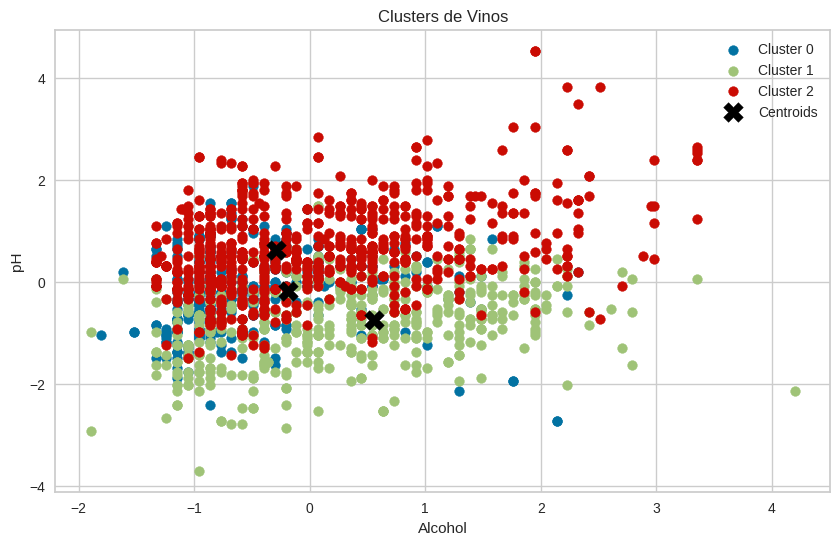

In [24]:
plt.figure(figsize=(10, 6))
for cluster in range(numero_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['alcohol'], cluster_data['pH'], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 9], kmeans.cluster_centers_[:, 8], s=200, c='black', marker='X', label='Centroids')

plt.title('Clusters de Vinos')
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.legend()
plt.show()

# 7.Obtener el número óptimo de grupos

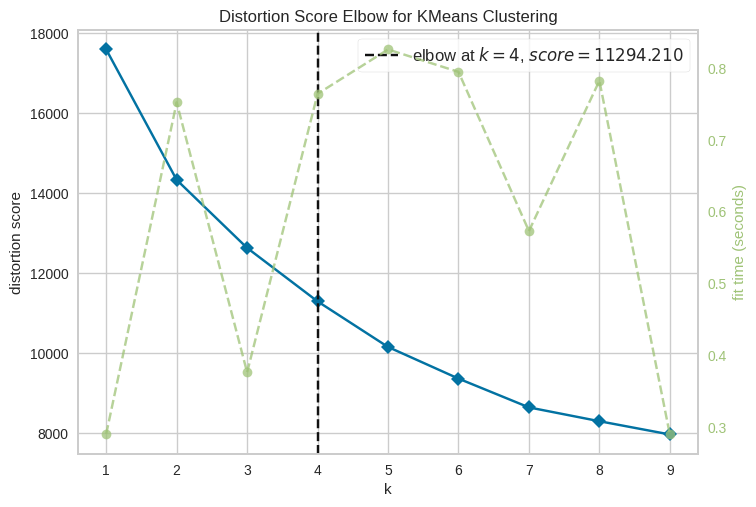

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Obtención del número óptimo de clústers
# librería yellowbrick que proporciona herramientas visuales para la selección de modelos, incluido el método de Elbow.

# Utiliza la visualización de codo para encontrar el número óptimo de clusters. Usar n_init=10
model = KMeans(n_init = 10)
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(df_std)
visualizer.show()

# 8.Modelo final (agrupación final). En este caso 4 grupos

In [25]:
# Número óptimo de clusters obtenido del gráfico del codo
# Asignar a la variable "optimal_clusters" el numero de clusteres para construir el modelo
optimal_clusters = 4

# Aplicar KMeans con el número óptimo de clusters (optimal_clusters)
# Asignar los clusteres obtenidos a la variable "clusters" después de haber realizado el fit_predict de KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(df_std)
# Agregar la columna de clusters al DataFrame original
df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


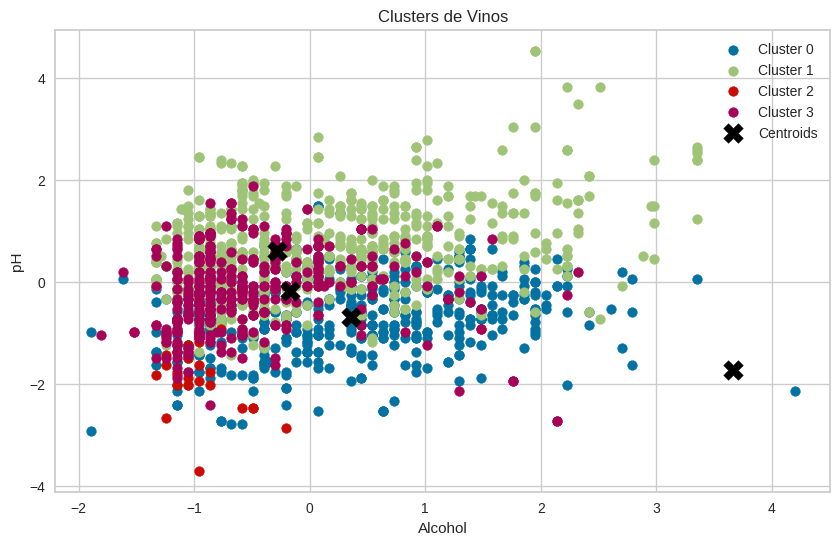

In [26]:
# Graficar los clusters en función de las características 'alcohol' y 'pH'
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['alcohol'], cluster_data['pH'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 9], kmeans.cluster_centers_[:, 8], s=200, c='black', marker='X', label='Centroids')
plt.title('Clusters de Vinos')
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.legend()
plt.show()

# 9.Interpretación de los grupos

In [27]:
# Realizar la media por cada cluster de todas las variables

df.groupby('Cluster').mean()

,4fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Cluster,,,,,,,,,,,
0,1.057700,-0.739087,1.013033,0.044234,-0.060335,-0.522103,-0.544623,0.441861,-0.697473,0.356587,0.357520
1,-0.648674,0.461831,-0.762879,-0.227666,-0.179422,-0.222442,-0.345479,-0.444238,0.607549,-0.284620,0.057944
2,0.095386,0.002199,1.181183,-0.389750,5.782951,-0.049500,0.510170,0.180016,-1.735249,3.662266,-0.869459
3,-0.072390,0.028852,0.123807,0.415147,-0.008496,1.087913,1.312817,0.295168,-0.175964,-0.167636,-0.494552


# 10.Interpretación de los grupos CON VARIABLES EXTERNAS

In [29]:
df_fin['clusters']=df['Cluster']

In [34]:
df_fin.groupby(['clusters'])['DO'].value_counts()

clusters  DO
0         2     339
          0     103
          1      15
          3      12
1         1     484
          0     242
          3       1
2         2      25
          3       2
          0       1
3         3     307
          2      27
          0      22
          1      19
Name: DO, dtype: int64